# Deep Neural Net - Logistic Regression for non linearly separable data

From Lesson: https://www.udemy.com/pytorch-for-deep-learning-and-computer-vision/learn/lecture/13171216#overview.

- You can add two linear models (with weights) in perceptrons, with a bias and sigmoid to get a non-linear line in the subsequent perceptron

![deep-neural-net](https://dm2pap090files.storage.live.com/y4pDCZcXqMJKhfIoZ59ci9tkVwHOcZW1chp62ZJa5NBS-zFzrJ9cggbkYj7p6D6lsX_HJI30Eih05BzAtzMW4mbsb4L2PyZUKB-EDzZCtcDHNq_hhhF3Q5hdffxoW5xCQTz_G2BfLqSJeTeOIX5Ky61kQ2AMT9jKoM9zmAMouZRX5elX7AqgM6LRh-o79RnQQNBR3JH4Gw96ijfs7a-VvBaP2krTE1hvU80I1CQCbOeOBk/dep-neural-net.png?psid=1&width=459&height=258)

Note that the weights in each perceptron correspond to the linear functions values:

![](https://dm2pap090files.storage.live.com/y4pieEj9dWOjpad2zx083nKgYevRaO3Y2yF9VsZA4tgE4vjgfcaYqchbde_2M1n3FLnhgJ5Fw9ulJYE-Uk--XtPiKf8wpahbMEVjHLOgxazB4ExpSeqsDc0kO1PspAlPDb_HJAa2VPaIdFuvoto08o3k5IIfnEMUg84yb39yoqBvRIypMkYkOWS-rocnwNq2WjtOTXbuz_v9pS5LpSPGhGLYhOF-4vdYNIP74aa4GJz3rs/deep-neurla-net-2.png?psid=1&width=428&height=275)

Keep taking the linear combination, then the sigmoid to get the probability of the point being in the positive region of the line

**Steps**:

1. Feedforward to predict all outputs
2. Determine total error with Cross Entropy (Cross Entropy is a resonable error f(x)).  **-SUM(y ln(p) + (1-y)(1l(1 - p)))**
3. Backpropogation.
4. Repeat at some learning rate




A good place to visualize neural nets is:

http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.85859&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

from sklearn import datasets

In [18]:
n_pts = 500
centers = [[-0.5, 0.5],[0.5, -0.5]]

# we want a circular dataset of two classes that cannot be linearly separated by one or two lines
X, y = datasets.make_circles(n_samples=n_pts, random_state=123,noise=0.1, factor=0.2) # make circular dataset.  Outer is 0, inner is 1
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

# print(X)
# print(y)

In [19]:
def scatter_plot():
    '''
    Print a scatterplot
    '''
    plt.scatter(X[y==0,0], X[y==0, 1]) # Where labels are 0
    plt.scatter(X[y==1,0], X[y==1, 1]) # Where labels are 1
# X and y are numpy arrays, they must be in the form of tensors.

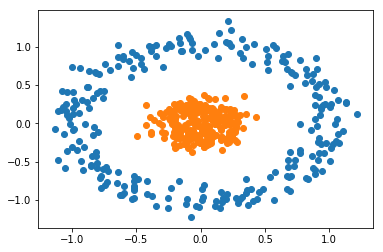

In [20]:
# Plot Raw Data
scatter_plot()

In [21]:
class Model(nn.Module):
    '''
    Class of a perceptron for deep neural network
    '''
    def __init__(self,input_size, h1, output_size):
        super().__init__() # inherit from parent class
        self.linear = nn.Linear(input_size, h1)
        self.linear2 = nn.Linear(h1, output_size)

    def forward(self, x):
        '''
        pass forward through linear models and apply sigmoid (to convert output to probability)
        '''
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [22]:
# Set seed, initialize model and print model parameters (random)

torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


# Modeling/Training

In [23]:
# Step 1 - Cross Entropy
criterion = nn.BCELoss()

# Step 2 - Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [24]:
# Step 3 - Train
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:",i,"loss",loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad() # Set gradient to zero because they accumulate between ruins
    loss.backward() # Compute the gradient
    optimizer.step() # Update the parameters

epoch: 0 loss 0.7148522138595581
epoch: 1 loss 0.6947312355041504
epoch: 2 loss 0.6955161094665527
epoch: 3 loss 0.7014897465705872
epoch: 4 loss 0.7013992667198181
epoch: 5 loss 0.697472095489502
epoch: 6 loss 0.6939275860786438
epoch: 7 loss 0.6928625106811523
epoch: 8 loss 0.693941593170166
epoch: 9 loss 0.6954426765441895
epoch: 10 loss 0.6958808302879333
epoch: 11 loss 0.6949241757392883
epoch: 12 loss 0.693157970905304
epoch: 13 loss 0.691401481628418
epoch: 14 loss 0.6901755332946777
epoch: 15 loss 0.6894775629043579
epoch: 16 loss 0.6888664364814758
epoch: 17 loss 0.6877952814102173
epoch: 18 loss 0.6859349012374878
epoch: 19 loss 0.6832882165908813
epoch: 20 loss 0.6800878047943115
epoch: 21 loss 0.6766111254692078
epoch: 22 loss 0.6730254888534546
epoch: 23 loss 0.6693331003189087
epoch: 24 loss 0.6653968095779419
epoch: 25 loss 0.661038875579834
epoch: 26 loss 0.6561349034309387
epoch: 27 loss 0.6506633758544922
epoch: 28 loss 0.6446858048439026
epoch: 29 loss 0.638284146785

epoch: 256 loss 0.011986931785941124
epoch: 257 loss 0.011920420452952385
epoch: 258 loss 0.011854540556669235
epoch: 259 loss 0.011789293959736824
epoch: 260 loss 0.011724630370736122
epoch: 261 loss 0.011660600081086159
epoch: 262 loss 0.011597171425819397
epoch: 263 loss 0.01153431087732315
epoch: 264 loss 0.011472049169242382
epoch: 265 loss 0.0114103639498353
epoch: 266 loss 0.011349229142069817
epoch: 267 loss 0.011288655921816826
epoch: 268 loss 0.011228623799979687
epoch: 269 loss 0.011169149540364742
epoch: 270 loss 0.011110198684036732
epoch: 271 loss 0.011051777750253677
epoch: 272 loss 0.010993875563144684
epoch: 273 loss 0.010936497710645199
epoch: 274 loss 0.01087961345911026
epoch: 275 loss 0.010823244228959084
epoch: 276 loss 0.010767344385385513
epoch: 277 loss 0.010711949318647385
epoch: 278 loss 0.010657035745680332
epoch: 279 loss 0.01060259249061346
epoch: 280 loss 0.010548616759479046
epoch: 281 loss 0.010495093651115894
epoch: 282 loss 0.010442026890814304
epoch:

epoch: 486 loss 0.004698074422776699
epoch: 487 loss 0.004683562088757753
epoch: 488 loss 0.0046691265888512135
epoch: 489 loss 0.004654772114008665
epoch: 490 loss 0.004640478640794754
epoch: 491 loss 0.004626269917935133
epoch: 492 loss 0.004612134303897619
epoch: 493 loss 0.004598071798682213
epoch: 494 loss 0.004584072157740593
epoch: 495 loss 0.004570151679217815
epoch: 496 loss 0.0045563033781945705
epoch: 497 loss 0.0045425244607031345
epoch: 498 loss 0.004528810270130634
epoch: 499 loss 0.00451517291367054
epoch: 500 loss 0.004501602612435818
epoch: 501 loss 0.004488104954361916
epoch: 502 loss 0.004474670626223087
epoch: 503 loss 0.004461307544261217
epoch: 504 loss 0.004448010586202145
epoch: 505 loss 0.004434778820723295
epoch: 506 loss 0.004421617370098829
epoch: 507 loss 0.004408524837344885
epoch: 508 loss 0.0043954914435744286
epoch: 509 loss 0.004382523242384195
epoch: 510 loss 0.004369627218693495
epoch: 511 loss 0.004356790333986282
epoch: 512 loss 0.00434401910752058

epoch: 720 loss 0.002619410865008831
epoch: 721 loss 0.002614058554172516
epoch: 722 loss 0.002608724869787693
epoch: 723 loss 0.002603408182039857
epoch: 724 loss 0.002598108258098364
epoch: 725 loss 0.0025928309187293053
epoch: 726 loss 0.0025875649880617857
epoch: 727 loss 0.0025823202449828386
epoch: 728 loss 0.0025770978536456823
epoch: 729 loss 0.002571885008364916
epoch: 730 loss 0.00256669451482594
epoch: 731 loss 0.0025615189224481583
epoch: 732 loss 0.0025563626550137997
epoch: 733 loss 0.002551223151385784
epoch: 734 loss 0.0025460985489189625
epoch: 735 loss 0.002540992572903633
epoch: 736 loss 0.0025359014980494976
epoch: 737 loss 0.0025308316107839346
epoch: 738 loss 0.0025257740635424852
epoch: 739 loss 0.002520736074075103
epoch: 740 loss 0.002515714382752776
epoch: 741 loss 0.0025107080582529306
epoch: 742 loss 0.0025057217571884394
epoch: 743 loss 0.002500745700672269
epoch: 744 loss 0.002495791530236602
epoch: 745 loss 0.002490848768502474
epoch: 746 loss 0.002485923

epoch: 957 loss 0.001714775338768959
epoch: 958 loss 0.001712063793092966
epoch: 959 loss 0.0017093607457354665
epoch: 960 loss 0.0017066631698980927
epoch: 961 loss 0.001703976304270327
epoch: 962 loss 0.0017012932803481817
epoch: 963 loss 0.001698615262284875
epoch: 964 loss 0.0016959485365077853
epoch: 965 loss 0.0016932832077145576
epoch: 966 loss 0.001690627308562398
epoch: 967 loss 0.0016879752511158586
epoch: 968 loss 0.001685332041233778
epoch: 969 loss 0.0016826954670250416
epoch: 970 loss 0.0016800627345219254
epoch: 971 loss 0.0016774411778897047
epoch: 972 loss 0.001674821600317955
epoch: 973 loss 0.0016722094733268023
epoch: 974 loss 0.0016696039820089936
epoch: 975 loss 0.0016670043114572763
epoch: 976 loss 0.0016644110437482595
epoch: 977 loss 0.001661824295297265
epoch: 978 loss 0.0016592448810115457
epoch: 979 loss 0.0016566693084314466
epoch: 980 loss 0.0016541030490770936
epoch: 981 loss 0.0016515376046299934
epoch: 982 loss 0.0016489842673763633
epoch: 983 loss 0.00

Text(0.5, 0, 'epoch')

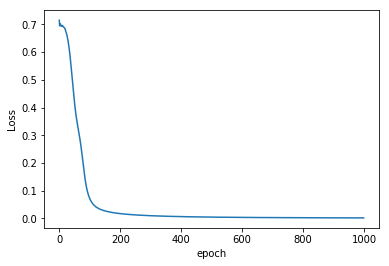

In [25]:
# plot the loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [26]:
def plot_decision_boundary(X, y):
    # we add some tolerance values of  0.25 on each for plotting (more visually appealing and spaced out grids)
    x_span = np.linspace(min(X[:,0]) -0.25, max(X[:,0] +0.25)) # All the horizontal coordinates are in the first column of the array.  Min and Max
    y_span = np.linspace(min(X[:,1])-0.25, max(X[:,0] +0.25)) # All the vertical coordinates are in the second column of the array,  Min and Max
    
    # We are trying to make a 50 x 50 cartesian grid which spans the total horizontal and vertical range of our data, so we use meshgrid.
    
    xx, yy = np.meshgrid(x_span,y_span) # take the vectors, create two squared 2d arrays.
    # For x vector (50 x 1) it will create a 50 x 50 array with repeated rows.
    # for Y vector (50 x 1) it will return a 50 x 50 array with repeated columns of the original column.
    
    # Flatten the xx and yy arrays into a 1d arrays.
        # Why?:  If we flatten and vertically concatenate, For each Y coordinate there are 3 corresponding x coordinates.
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    
    # This will test all the points in the 50x50 grid and return tensor of predictions which are probability of any point being 1.
    pred_func = model.forward(grid)
    
    # Reshape to have the same shape as xx, yy so they are linked properly
    z = pred_func.view(xx.shape).detach().numpy() # converting to numpy for plotting. # detach exclused any subgraphs that may be included.
    
    # Contour Plot.  Plots distinct contour zones.  Each zone represents an increased threshold of probability.
    plt.contourf(xx, yy, z) # z contains the magnitude of the probability corresponding to each point
    # Dark here has low probability of 1
    # lighter zone has higher probability of 1

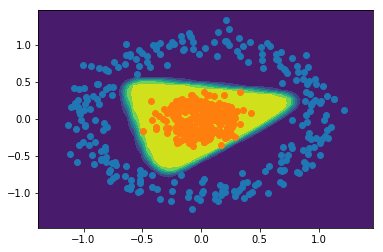

In [27]:
plot_decision_boundary(X,y)
scatter_plot()

Prediction = 1.  Probability = 0.9996602535247803


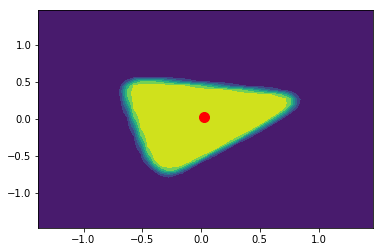

In [56]:
# Test a specific coordinate
x = 0.025
y = 0.025
point = torch.Tensor([x,y])

# perform prediction (class, custom function we made)
prediction = model.predict(point)

# perform prediction (probability)
prediction_probability = model.forward(point).item()

plt.plot([x],[y], marker = 'o', markersize = 10, color='red')
print('Prediction = {}.  Probability = {}'.format(prediction,prediction_probability))
plot_decision_boundary(X,y)